## 1).Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2).Read Data

In [2]:
dataFrame = pd.read_excel('CDR_Workshop.xlsx')
CDR = dataFrame.copy()
# ดูข้อมูล head 5 บรรทัดแรก

CDR.head()

,PhoneNumber,Num_Callout,Avg_Callout,Num_Callin,Avg_Callin
0,089-1000000,20,181.850000,23,192.086957
1,089-1000001,17,338.705882,14,139.785714
2,089-1000002,30,138.933333,24,128.333333
3,089-1000003,13,196.846154,21,114.571429
4,089-1000004,14,255.571429,28,179.964286


In [3]:
CDR.describe() #แสดงค่าทาง สถิติ

,Num_Callout,Avg_Callout,Num_Callin,Avg_Callin
count,501.000000,501.000000,501.000000,501.000000
mean,19.960080,169.173590,19.960080,170.669939
std,8.703241,56.318809,9.017672,50.343070
min,3.000000,57.750000,4.000000,55.750000
25%,14.000000,130.846154,13.000000,135.480000
50%,19.000000,157.277778,18.000000,165.294118
75%,24.000000,196.200000,25.000000,197.384615
max,52.000000,396.941176,49.000000,393.500000


## 3. Explore Data

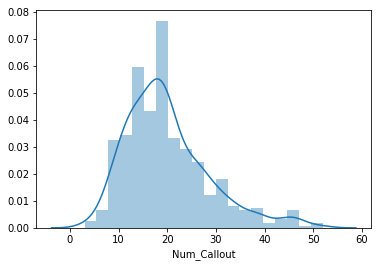

In [4]:
sns.distplot(CDR['Num_Callout'])

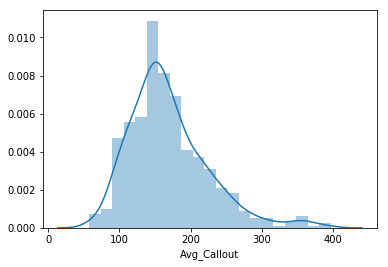

In [5]:
sns.distplot(CDR['Avg_Callout'])

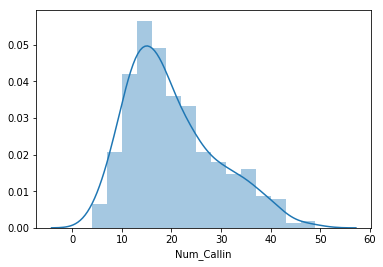

In [6]:
sns.distplot(CDR['Num_Callin'])

In [7]:
# take log
CDR['Num_Callin']= np.log(CDR['Num_Callin'])
#X_train_log = X_train_log.replace(-np.inf, 0)

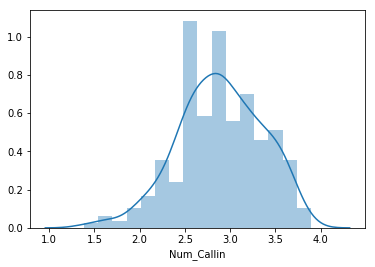

In [8]:
sns.distplot(CDR['Num_Callin'])

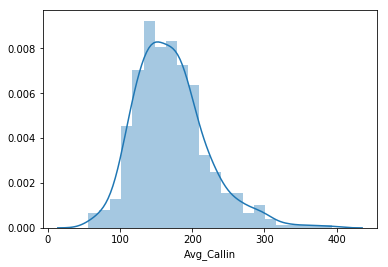

In [9]:
sns.distplot(CDR['Avg_Callin'])

## 4. Nomalized Data แบบ Z Transfrom

In [10]:
CDR_normalized = dataFrame.copy()

CDR_normalized_PhoneNumber = CDR_normalized['PhoneNumber']
CDR_normalized.drop(columns=['PhoneNumber'], inplace=True)

CDR_normalized = (CDR_normalized - CDR_normalized.mean())/CDR_normalized.std()

CDR_normalized['PhoneNumber'] = CDR_normalized_PhoneNumber
CDR_normalized.head()

,Num_Callout,Avg_Callout,Num_Callin,Avg_Callin,PhoneNumber
0,0.004587,0.225083,0.337107,0.425421,089-1000000
1,-0.340112,3.010225,-0.660933,-0.613475,089-1000001
2,1.153584,-0.536948,0.448000,-0.840962,089-1000002
3,-0.799711,0.491356,0.115320,-1.114324,089-1000003
4,-0.684812,1.534085,0.891574,0.184620,089-1000004


## 5.ทำ Model KMeans Custering แบ่ง Cluster

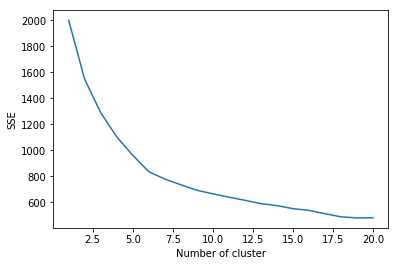

In [11]:
from sklearn.cluster import KMeans # code เพื่อการกำหนด cluster

sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(CDR_normalized.drop(columns=['PhoneNumber'])) # ต้องใส่ค่า Value เท่านั้น
    CDR_normalized['clusters'] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [12]:
print(sse)

{1: 1999.9999999999995, 2: 1546.0444447289299, 3: 1290.0812771172587, 4: 1103.7804106062254, 5: 962.0811050753858, 6: 836.3172467021416, 7: 779.7652246539085, 8: 736.3308430303911, 9: 693.7287797563149, 10: 666.6414785095938, 11: 640.7219303600497, 12: 616.7832968121295, 13: 590.7216091108575, 14: 576.145778908451, 15: 552.3127851931383, 16: 539.2666615909393, 17: 513.2273593949686, 18: 489.74832157697824, 19: 481.21557957844357, 20: 482.8266561324832}


In [13]:
kmeans = KMeans(n_clusters=8, max_iter=300).fit(CDR_normalized.drop(columns=['PhoneNumber'])) #ใส่จำนวน cluster = 8 ลงไป ตาม Default
CDR_normalized['clusters'] = kmeans.labels_
CDR_normalized.groupby(by=['clusters']).mean()

,Num_Callout,Avg_Callout,Num_Callin,Avg_Callin
clusters,,,,
0,-0.333354,0.963958,-0.510901,0.591636
1,-0.578036,0.518478,0.515208,0.126159
2,0.387954,-0.169391,-0.627879,0.257772
3,-0.556394,2.812012,1.002467,-0.078403
4,-0.425765,-0.774095,0.472195,-0.788314
5,0.253536,-0.281583,-0.464350,-0.466364
6,-0.597710,-0.627354,0.691250,-0.025136
7,1.852761,-0.651555,-0.316456,0.160789


In [14]:
kmeans = KMeans(n_clusters=5, max_iter=300).fit(CDR_normalized.drop(columns=['PhoneNumber'])) #ใส่จำนวน cluster =4 ลงไป ตามในตัวอย่าง
CDR_normalized['clusters'] = kmeans.labels_
CDR_normalized.groupby(by=['clusters']).mean()

,Num_Callout,Avg_Callout,Num_Callin,Avg_Callin
clusters,,,,
0,-0.448716,-0.072049,-0.581941,1.636949
1,1.772275,-0.559468,-0.449383,-0.097937
2,-0.487567,1.170249,0.625430,-0.307894
3,0.614439,-0.057584,-0.716380,-0.184761
4,-0.435514,-0.571596,0.318289,-0.374380


## 6. Evaluate Model

C:\Python Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


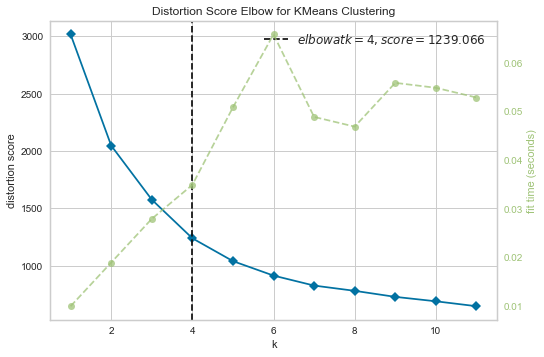

In [15]:
# K=5
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=5, max_iter=300).fit(CDR_normalized.drop(columns=['PhoneNumber'])) 
visualizer = KElbowVisualizer(model,k=(1,12))

visualizer.fit(CDR_normalized.drop(columns=['PhoneNumber']))      # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

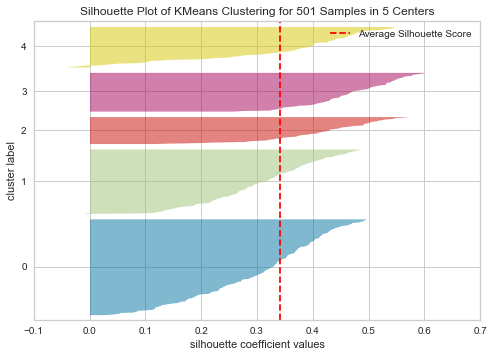

In [16]:
# K=5
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, max_iter=300).fit(CDR_normalized.drop(columns=['PhoneNumber'])) 
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(CDR_normalized.drop(columns=['PhoneNumber']))      # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

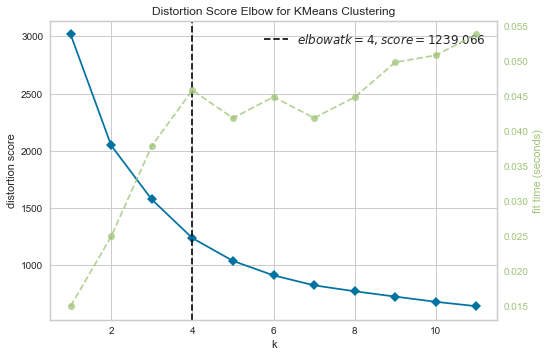

In [17]:
# ลอง K=4
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=4, max_iter=300).fit(CDR_normalized.drop(columns=['PhoneNumber'])) 
visualizer = KElbowVisualizer(model,k=(1,12))

visualizer.fit(CDR_normalized.drop(columns=['PhoneNumber']))      # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

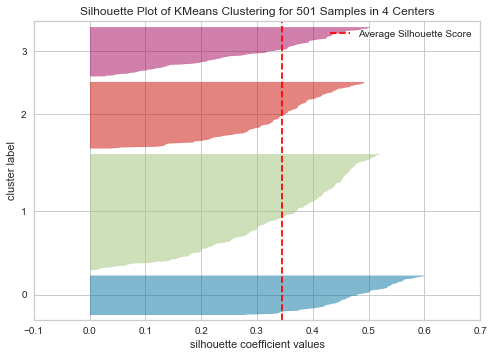

In [18]:
# K=4
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, max_iter=300).fit(CDR_normalized.drop(columns=['PhoneNumber'])) 
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(CDR_normalized.drop(columns=['PhoneNumber']))      # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## สรุปเลือก K=4 จาก KElbow&Silhouette Score

In [19]:
model = KMeans(n_clusters=4, max_iter=300).fit(CDR_normalized.drop(columns=['PhoneNumber'])) #ใส่จำนวน cluster =4 ลงไป ตามในตัวอย่าง
CDR_normalized['clusters'] = model.labels_
CDR_normalized.groupby(by=['clusters']).mean()

,Num_Callout,Avg_Callout,Num_Callin,Avg_Callin
clusters,,,,
0,-0.459683,1.168798,0.599464,-0.287990
1,1.597460,-0.338004,-0.522025,0.115062
2,-0.448716,-0.072049,-0.581941,1.636949
3,-0.297435,-0.506629,0.087333,-0.452407


## 7.Import Result

In [20]:
CDR = pd.merge(CDR, CDR_normalized[['PhoneNumber', 'clusters']], on=['PhoneNumber'])
CDR.head()

,PhoneNumber,Num_Callout,Avg_Callout,Num_Callin,Avg_Callin,clusters
0,089-1000000,20,181.850000,3.135494,192.086957,0
1,089-1000001,17,338.705882,2.639057,139.785714,0
2,089-1000002,30,138.933333,3.178054,128.333333,1
3,089-1000003,13,196.846154,3.044522,114.571429,3
4,089-1000004,14,255.571429,3.332205,179.964286,0


In [21]:
CDR.to_excel('CDR_Best.xlsx',sheet_name='Sheet1',index=False)